Digit Recognizer
help : https://www.kaggle.com/arslangujjar/digit-recognizer-with-tensorflow-neural-network

In [1]:
#Import Librairies

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

In [2]:
train = pd.read_csv('data/train.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test = pd.read_csv('data/test.csv')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.shape, train.shape

((28000, 784), (42000, 785))

In [5]:
# Extract features
features = train.drop('label', axis=1)

# Extract label
y_train = train['label']

# Train images
X_ = np.array(features)
X_train = X_.reshape(X_.shape[0], 28, 28)

# Test images
X_test = np.array(test)

In [6]:
# Test images
X_ = np.array(test)
X_test = X_.reshape(X_.shape[0], 28, 28)

In [7]:
X_train.shape, X_test.shape

((42000, 28, 28), (28000, 28, 28))

In [8]:
# Normalisation des données
print(X_train.min(), X_train.max())
print(X_test.min(), X_train.max())

0 255
0 255


In [9]:
X_train = X_train/255.
X_test = X_test/255.

Création du model de machine learning


Create or import a model
Compile a model
Fit the model
Evaluate the model
Tweak
Evaluate

In [11]:
#Création du model
#Flatten passer de 2D à 1D
#Termine par 10 car c'est le nombre de classes
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                            tf.keras.layers.Dense(256, activation="relu"),
                            tf.keras.layers.Dense(64, activation="relu"),
                            tf.keras.layers.Dense(10)])

#Compilation du model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            optimizer=tf.keras.optimizers.Adam(),
            metrics=["accuracy"])

#Fit the model
history = model.fit(X_train, y_train, epochs=50)


Epoch 1/50
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2481 - accuracy: 0.9262
Epoch 2/50
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1007 - accuracy: 0.9696
Epoch 3/50
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0672 - accuracy: 0.9791
Epoch 4/50
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0477 - accuracy: 0.9852
Epoch 5/50
1313/1313 [==============================] - 2s 2ms/step - loss: 0.0391 - accuracy: 0.9871
Epoch 6/50
1313/1313 [==============================] - 2s 2ms/step - loss: 0.0285 - accuracy: 0.9905
Epoch 7/50
1313/1313 [==============================] - 2s 2ms/step - loss: 0.0238 - accuracy: 0.9920
Epoch 8/50
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0197 - accuracy: 0.9935
Epoch 9/50
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0182 - accuracy: 0.9941
Epoch 10/50
1313/1313 [==============================] - 2s 2ms/step - loss: 0.015

<AxesSubplot:>

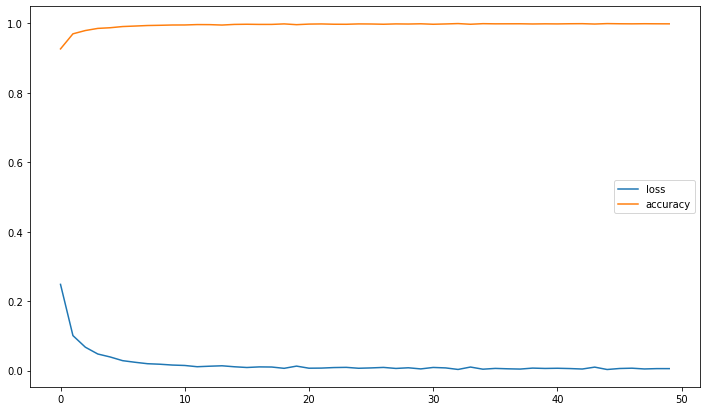

In [12]:
pd.DataFrame(history.history).plot(figsize=(12,7))

In [13]:
#Prédictions
predictions = np.argmax(model.predict(X_test), axis = 1)

In [14]:
predictions

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [15]:
submission = pd.read_csv('data/sample_submission.csv')
submission.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [16]:
submission['Label']  = predictions

In [17]:
submission.to_csv('submission.csv',index=False)
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [27]:
import imageio

im = imageio.imread('data/test.png')
im.shape

im_test = im.reshape(1, 28, 28)

prediction_test = np.argmax(model.predict(im_test), axis = 1)
prediction_test

array([3], dtype=int64)